<a href="https://colab.research.google.com/github/swarnava-96/Digit-Recognition/blob/main/MNIST_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MNIST Digit Recognition**
The goal of this project is to recognize digits using ANN on Keras MNIST dataset.

In [2]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [1]:
# Lets import tensorflow==2.5.0
!pip install tensorflow==2.5.0

     |████████████████████████████████| 454.3 MB 12 kB/s 
     |████████████████████████████████| 462 kB 39.7 MB/s 
     |████████████████████████████████| 4.0 MB 38.2 MB/s 
     |████████████████████████████████| 1.2 MB 36.5 MB/s 
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.41.0
    Uninstalling grpcio-1.41.0:
      Successfully uninstalled grpcio-1.41.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.0
    Uninstalling tensorflow-2.6.0:
      Successfully uninstalled tensorflow-2.6.0


In [3]:
# Lets see the tensorflow version
import tensorflow
tensorflow.__version__

'2.5.0'

In [4]:
# Lets load the dataset
(X_train, y_train), (X_test, y_test) = tensorflow.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
# Lets see the shape of the dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


5


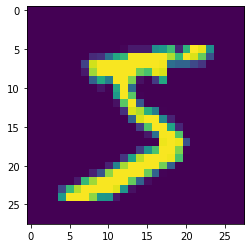

In [8]:
# Lets see an image from the dataset and the corresponding label
plt.imshow(X_train[0])
print(y_train[0]);

In [9]:
# Lets scale down the data
X_train = X_train/255
X_test = X_test/255

In [10]:
# Model Building
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

In [11]:
# Lets see the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Lets compile the model
model.compile(optimizer = "Adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [14]:
# Model training
history = model.fit(X_train, y_train, batch_size = 64, epochs = 10, validation_split = 0.2, verbose = 1)

Epoch 1/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1498 - accuracy: 0.9569 - val_loss: 0.1326 - val_accuracy: 0.9622
Epoch 2/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1050 - accuracy: 0.9689 - val_loss: 0.1130 - val_accuracy: 0.9664
Epoch 3/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0804 - accuracy: 0.9769 - val_loss: 0.0996 - val_accuracy: 0.9711
Epoch 4/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0634 - accuracy: 0.9815 - val_loss: 0.0984 - val_accuracy: 0.9713
Epoch 5/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0505 - accuracy: 0.9849 - val_loss: 0.0930 - val_accuracy: 0.9738
Epoch 6/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0410 - accuracy: 0.9881 - val_loss: 0.0885 - val_accuracy: 0.9738
Epoch 7/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0342 - accuracy: 0.9900 - val_loss: 0.0867 - val_accuracy: 0.9756
Epoch 

In [15]:
# Model evaluation
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0819 - accuracy: 0.9775


[0.08190084993839264, 0.9775000214576721]

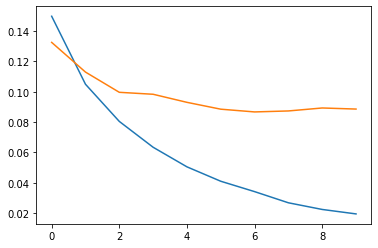

In [18]:
# Lets plot the losses
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"]);

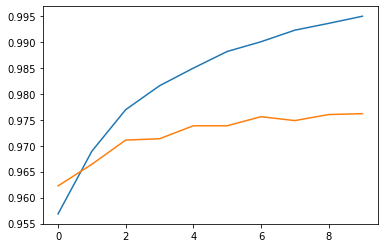

In [21]:
# Lets plot the accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"]);